In [31]:
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from preprocess import TextCleaner
from wordcloud import WordCloud

In [32]:
df = pd.read_csv('trials.csv')

In [34]:
# Preprocess text using the TextCleaner in preprocess.py

cleaner = TextCleaner()
df['cleaned_text'] = df['description'].apply(cleaner.clean_text)

Dataset preview:
         nctid                                        description label  \
0  NCT02464748  MND is often referred to as amyotrophic latera...   ALS   
1  NCT00362362  OBJECTIVE:||The causes of sporadic motor neuro...   ALS   
2  NCT03154450  Non-invasive ventilation (NIV) use in patients...   ALS   
3  NCT03487263  The objectives of this study are to determine:...   ALS   
4  NCT04454892  With the development of supportive measures, t...   ALS   

                                        cleaned_text  
0  mnd is often referred to as amyotrophic latera...  
1  objectivethe causes of sporadic motor neuron d...  
2  non-invasive ventilation niv use in patients w...  
3  the objectives of this study are to determinet...  
4  with the development of supportive measures th...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----

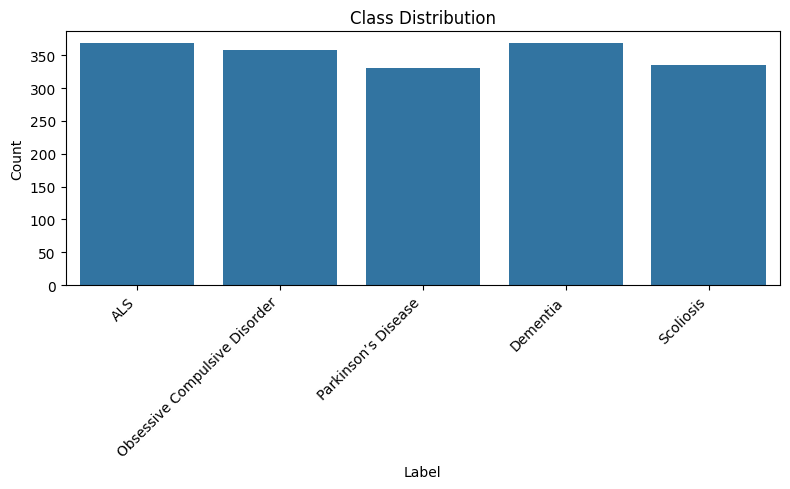

In [7]:
print("Dataset preview:")
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Class distribution with visible labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate labels
plt.tight_layout()  # Adjust padding
plt.show()


Text Length Stats:
count    1759.000000
mean      295.670267
std       309.366519
min         2.000000
25%       111.500000
50%       207.000000
75%       355.000000
max      3297.000000
Name: text_length, dtype: float64


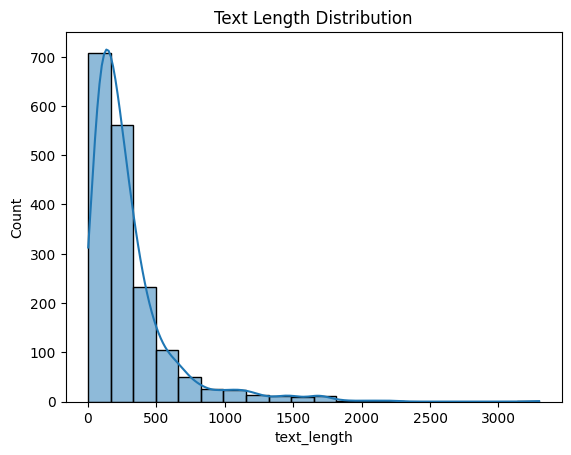

In [8]:
# Text length analysis
df['text_length'] = df['cleaned_text'].astype(str).apply(lambda x: len(x.split()))
print("\nText Length Stats:")
print(df['text_length'].describe())

sns.histplot(df['text_length'], bins=20, kde=True)
plt.title("Text Length Distribution")
plt.show()

In [9]:
# Most common words
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)
print("\nMost common words:")
print(word_freq.most_common(10))


Most common words:
[('the', 28237), ('of', 19605), ('and', 18707), ('to', 13476), ('in', 10959), ('will', 10436), ('a', 9041), ('be', 8201), ('with', 6500), ('for', 5972)]


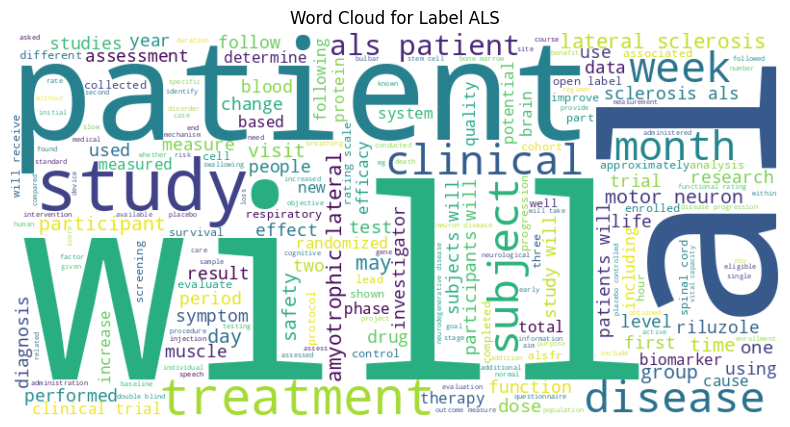

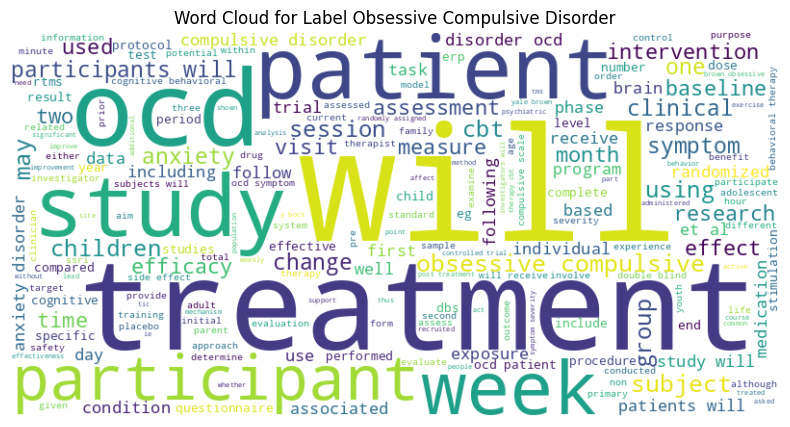

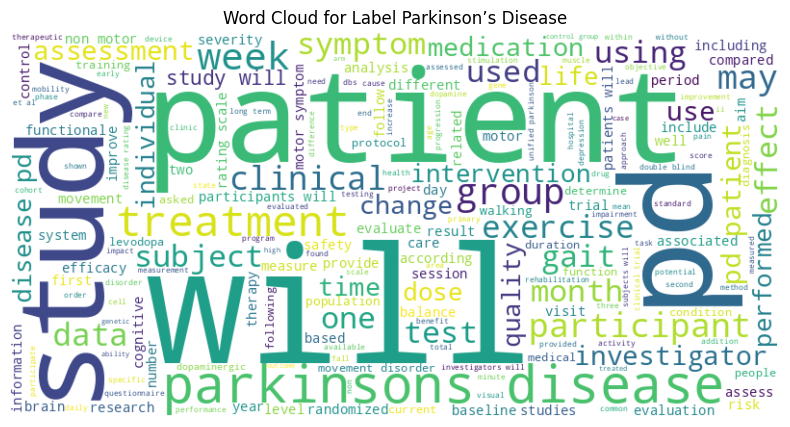

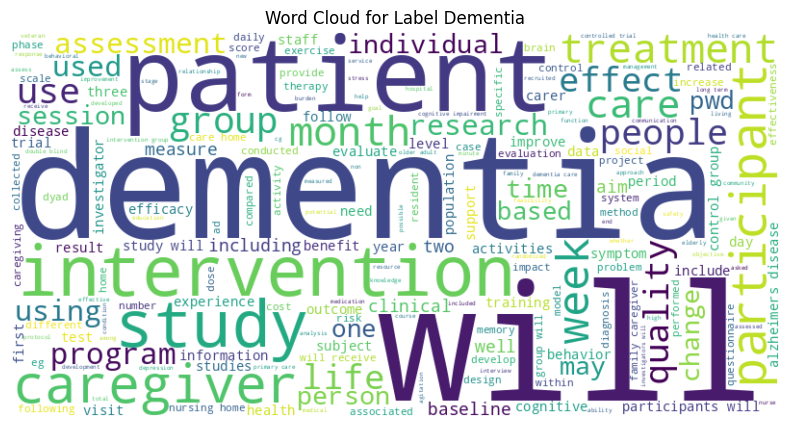

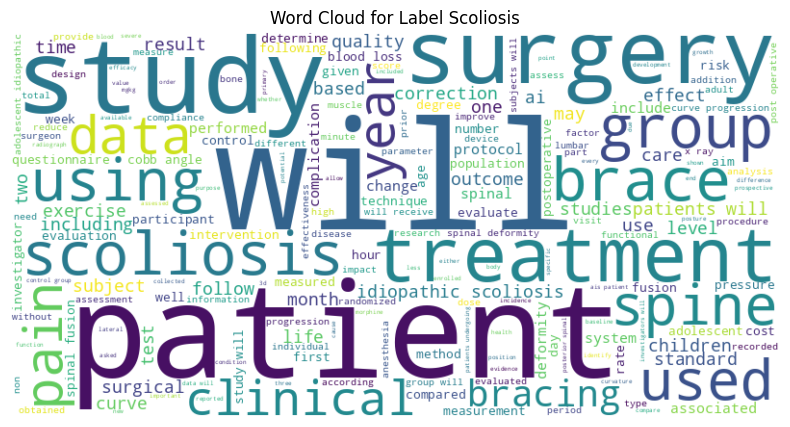

In [10]:
# Word cloud for each label
labels = df['label'].unique()

for label in labels:
    subset = df[df['label'] == label]
    words = ' '.join(subset['cleaned_text'])

    wordcloud = WordCloud(
        width=800, height=400, background_color='white'
    ).generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Label {label}")
    plt.show()

In [15]:
# Count rows with more than 512 words
long_texts = df[df['text_length'] > 512]
num_long_texts = long_texts.shape[0]

print(f"\nNumber of rows with more than 512 words: {num_long_texts}")
print("\nExamples of long texts (>512 words):")
print(long_texts['cleaned_text'])


Number of rows with more than 512 words: 241

Examples of long texts (>512 words):
23      these stem cells are called human spinal stem ...
37      amyotrophic lateral sclerosis als or lou gehri...
39      amyotrophic lateral sclerosis als or motor neu...
51      once the eligibility is confirmed approximatel...
61      amyotrophic lateral sclerosis als is a progres...
                              ...                        
1736    chiari malformation is characterized by at lea...
1738    in total hip arthroplasty tha incorrect cup or...
1748    backgroundlumbar spinal stenosis lss is charac...
1749    a clinical trial comparing effectiveness of a ...
1751    the movemama project includes two protocols 1 ...
Name: cleaned_text, Length: 241, dtype: object


In [29]:
# Count rows with less than 12 words
short_texts = df[df['text_length'] < 10]
num_short_texts = short_texts.shape[0]

print(f"\nNumber of rows with less than 10 words: {num_short_texts}")
print("\nExamples of short texts (<10 words):")
print(short_texts['cleaned_text'])


Number of rows with less than 10 words: 10

Examples of short texts (<10 words):
127       this study is an extension study of nct03626012
192                there is no more extensive information
365     due to limited participation this study has cl...
406                     see brief summary for description
448                                             see above
541     please see the brief summary for study descrip...
985                              no extensive description
1019    multinational multicenter randomized parallel-...
1596                         the study has been completed
1689                                            see above
Name: cleaned_text, dtype: object


In [ ]:
# The above rows with less than 10 words tend to make no sense as they carry no information related to the desease
# They can effect the models negatively.
# Hence, we can remove them from our training/validation dataset (see training notebook)